In [10]:
%matplotlib inline
%load_ext autoreload 
%autoreload 2
from importlib import reload

In [11]:
#########################################################
# Convolutional layer based AE with MNIST, Models/Class
#########################################################

###########################
# AE 모델링
###########################
from keras import layers, models


def Conv2D(filters, kernel_size, padding='same', activation='relu'):
    return layers.Conv2D(filters, kernel_size, padding=padding, activation=activation)


class AE(models.Model):
    def __init__(self, org_shape=(1, 28, 28)):
        # Input
        original = layers.Input(shape=org_shape)

        # encoding-1
        x = Conv2D(4, (3, 3))(original)
        x = layers.MaxPooling2D((2, 2), padding='same')(x)

        # encoding-2
        x = Conv2D(8, (3, 3))(x)
        x = layers.MaxPooling2D((2, 2), padding='same')(x)

        # encoding-3: encoding output: 7x7 pixels
        z = Conv2D(1, (7, 7))(x)

        # decoding-1
        y = Conv2D(16, (3, 3))(z)
        y = layers.UpSampling2D((2, 2))(y)

        # decoding-2
        y = Conv2D(8, (3, 3))(y)
        y = layers.UpSampling2D((2, 2))(y)

        # decoding-3
        y = Conv2D(4, (3, 3))(y)

        # decoding & Output
        decoded = Conv2D(1, (3, 3), activation='sigmoid')(y)

        super().__init__(original, decoded)
        self.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])


###########################
# 데이타 불러오기
###########################
from cnn_mnist_cl import DATA


###########################
# 학습 효과 분석
###########################
from ann_mnist_cl import plot_loss, plot_acc
import matplotlib.pyplot as plt


###########################
# AE 동작 확인
###########################
from keras import backend 


def show_ae(autoencoder, data):
    x_test = data.x_test
    decoded_imgs = autoencoder.predict(x_test)
    print(decoded_imgs.shape, data.x_test.shape)

    if backend.image_data_format() == 'channels_first':
        N, n_ch, n_i, n_j = x_test.shape
    else:
        N, n_i, n_j, n_ch = x_test.shape

    x_test = x_test.reshape(N, n_i, n_j)
    decoded_imgs = decoded_imgs.reshape(decoded_imgs.shape[0], n_i, n_j)
    
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):

        ax = plt.subplot(2, n, i + 1)
        # plt.imshow(x_test[i], cmap='YlGnBu')
        plt.imshow(x_test[i], cmap='Greys_r')
        # plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        # plt.imshow(decoded_imgs[i], cmap='YlGnBu')
        plt.imshow(decoded_imgs[i], cmap='Greys_r')
        # plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()
    

###########################
# 학습 및 확인
###########################
def main(epochs=20, batch_size=128):
    data = DATA()
    autoencoder = AE(data.input_shape)

    history = autoencoder.fit(data.x_train, data.x_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              shuffle=True,
                              validation_split=0.2)

    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()

    show_ae(autoencoder, data)
    plt.show()

In [ ]:
epochs=20
batch_size=128

data = DATA()
autoencoder = AE(data.input_shape)

history = autoencoder.fit(data.x_train, data.x_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_split=0.2)

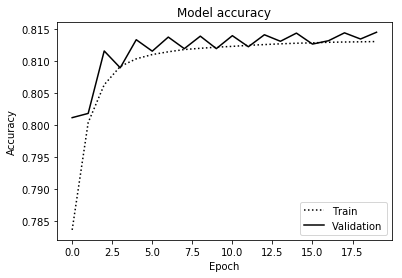

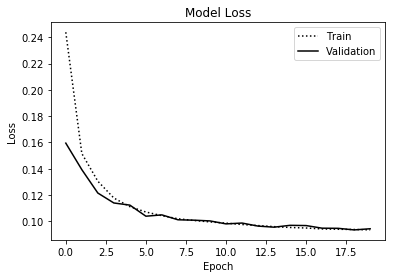

(10000, 28, 28, 1) (10000, 28, 28, 1)


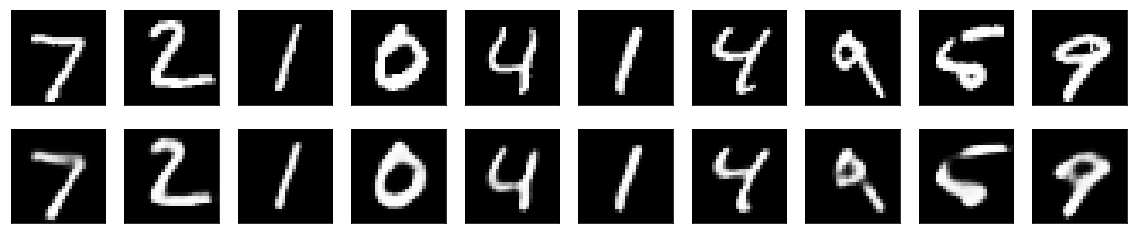

In [15]:
import ann_mnist_cl 
reload(ann_mnist_cl)
ann_mnist_cl.plot_acc(history)
plt.show()
ann_mnist_cl.plot_loss(history)
plt.show()

show_ae(autoencoder, data)
plt.show()